In [1]:
import pandas as pd
import numpy as np
from preprocessing_unique import create_testdata
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import make_pipeline
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import shap
import pymc3 as pm

/Users/billyzhaoyh/anaconda/envs/gdal/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [43]:
features_train,windspeed_train,features_test,windspeed_test=create_testdata('50',1)
#seperate out the one-hot encoding variables before standardization 
df1 = features_train.iloc[:, :17]
df2 = features_train.iloc[:, 17:]
df3 = features_test.iloc[:, :17]
df4 = features_test.iloc[:, 17:]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df1)
dftrain=scaler.transform(df1)
dftest=scaler.transform(df3)

df1=pd.DataFrame(data=dftrain,index=df1.index.values,columns=df1.columns.values)
df3=pd.DataFrame(data=dftest,index=df3.index.values,columns=df3.columns.values)

features_train=pd.concat([df1,df2], axis=1)
features_test=pd.concat([df3,df4], axis=1)

In [44]:
def get_country(row):
    for c in country.columns:
        if row[c]==1:
            return c

In [50]:
#reverse one-hot encoding:
country_train=features_train.iloc[:, 17:]
country_traincat=country_train.apply(get_country, axis=1)
data_train=features_train.iloc[:, :17]
X_train=pd.concat([data_train,country_traincat], axis=1)
county_names_train=X_train[0].unique()
X_train[0] = X_train[0].astype('category')
X_train[0] = X_train[0].cat.codes
county_idx_train = X_train[0].values
n_counties_train = len(X_train[0].unique())
X_train_real=X_train.iloc[:,:18]

In [51]:
#reverse one-hot encoding:
country_test=features_test.iloc[:, 17:]
country_testcat=country_test.apply(get_country, axis=1)
data_test=features_test.iloc[:, :17]
X_test=pd.concat([data_test,country_testcat], axis=1)
county_names_test=X_test[0].unique()
X_test[0] = X_test[0].astype('category')
X_test[0] = X_test[0].cat.codes
county_idx_test = X_test[0].values
n_counties_test = len(X_test[0].unique())
X_test_real=X_test.iloc[:,:18]

In [52]:
X_train_real.shape

(727, 18)

In [67]:
with pm.Model() as hierarchical_model:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sd=100)
    sigma_a = pm.HalfNormal('sigma_a', 5.)
    mu_b = pm.Normal('mu_b', mu=0., sd=100)
    sigma_b = pm.HalfNormal('sigma_b', 5.)
    mu_c = pm.Normal('mu_c', mu=0., sd=100)
    sigma_c = pm.HalfNormal('sigma_c', 5.)
    mu_d = pm.Normal('mu_d', mu=0., sd=100)
    sigma_d = pm.HalfNormal('sigma_d', 5.)
    mu_e = pm.Normal('mu_e', mu=0., sd=100)
    sigma_e = pm.HalfNormal('sigma_e', 5.)
    mu_f = pm.Normal('mu_f', mu=0., sd=100)
    sigma_f = pm.HalfNormal('sigma_f', 5.)
    mu_g = pm.Normal('mu_g', mu=0., sd=100)
    sigma_g = pm.HalfNormal('sigma_g', 5.)
    mu_h = pm.Normal('mu_h', mu=0., sd=100)
    sigma_h = pm.HalfNormal('sigma_h', 5.)
    mu_i = pm.Normal('mu_i', mu=0., sd=100)
    sigma_i = pm.HalfNormal('sigma_i', 5.)
    mu_j = pm.Normal('mu_j', mu=0., sd=100)
    sigma_j = pm.HalfNormal('sigma_j', 5.)
    mu_k = pm.Normal('mu_k', mu=0., sd=100)
    sigma_k = pm.HalfNormal('sigma_k', 5.)
    mu_l = pm.Normal('mu_l', mu=0., sd=100)
    sigma_l = pm.HalfNormal('sigma_l', 5.)
    mu_m = pm.Normal('mu_m', mu=0., sd=100)
    sigma_m = pm.HalfNormal('sigma_m', 5.)
    mu_n = pm.Normal('mu_n', mu=0., sd=100)
    sigma_n = pm.HalfNormal('sigma_n', 5.)
    mu_o = pm.Normal('mu_o', mu=0., sd=100)
    sigma_o = pm.HalfNormal('sigma_o', 5.)
    mu_p = pm.Normal('mu_p', mu=0., sd=100)
    sigma_p = pm.HalfNormal('sigma_p', 5.)
    mu_q = pm.Normal('mu_q', mu=0., sd=100)
    sigma_q = pm.HalfNormal('sigma_q', 5.)
    mu_r = pm.Normal('mu_r', mu=0., sd=100)
    sigma_r = pm.HalfNormal('sigma_r', 5.)
    mu_s = pm.Normal('mu_s', mu=0., sd=100)
    sigma_s = pm.HalfNormal('sigma_s', 5.)

    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    a = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=n_counties)
    # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal('b', mu=mu_b, sd=sigma_b, shape=n_counties)
    c = pm.Normal('c', mu=mu_c, sd=sigma_c, shape=n_counties)
    # Intercept for each county, distributed around group mean mu_a
    d = pm.Normal('d', mu=mu_d, sd=sigma_d, shape=n_counties)
    e = pm.Normal('e', mu=mu_e, sd=sigma_e, shape=n_counties)
    # Intercept for each county, distributed around group mean mu_a
    f = pm.Normal('f', mu=mu_f, sd=sigma_f, shape=n_counties)
    g = pm.Normal('g', mu=mu_g, sd=sigma_g, shape=n_counties)
    # Intercept for each county, distributed around group mean mu_a
    h = pm.Normal('h', mu=mu_h, sd=sigma_h, shape=n_counties)
    i = pm.Normal('i', mu=mu_i, sd=sigma_i, shape=n_counties)
    # Intercept for each county, distributed around group mean mu_a
    j = pm.Normal('j', mu=mu_j, sd=sigma_j, shape=n_counties)
    k = pm.Normal('k', mu=mu_k, sd=sigma_k, shape=n_counties)
    # Intercept for each county, distributed around group mean mu_a
    l = pm.Normal('l', mu=mu_l, sd=sigma_l, shape=n_counties)
    m = pm.Normal('m', mu=mu_m, sd=sigma_m, shape=n_counties)
    n = pm.Normal('n', mu=mu_n, sd=sigma_n, shape=n_counties)
    o = pm.Normal('o', mu=mu_o, sd=sigma_o, shape=n_counties)
    p = pm.Normal('p', mu=mu_p, sd=sigma_p, shape=n_counties)
    q = pm.Normal('q', mu=mu_q, sd=sigma_q, shape=n_counties)
    r = pm.Normal('r', mu=mu_r, sd=sigma_r, shape=n_counties)
    s = pm.Normal('s', mu=mu_s, sd=sigma_s, shape=n_counties)


    # Model error
    eps = pm.HalfCauchy('eps', 5.)

    windspeed_est = (a[county_idx]*X_train_real.iloc[:,0] + b[county_idx]*X_train_real.iloc[:,1]
    +c[county_idx]*X_train_real.iloc[:,2]+ d[county_idx]*X_train_real.iloc[:,3] 
    + e[county_idx]*X_train_real.iloc[:,4]+ f[county_idx]*X_train_real.iloc[:,5]
    + g[county_idx]*X_train_real.iloc[:,6] + h[county_idx]*X_train_real.iloc[:,7]
    + i[county_idx]*X_train_real.iloc[:,8] + j[county_idx]*X_train_real.iloc[:,9]
    + k[county_idx]*X_train_real.iloc[:,10]+ l[county_idx]*X_train_real.iloc[:,11]
    + m[county_idx]*X_train_real.iloc[:,12] + n[county_idx]*X_train_real.iloc[:,13]
    + o[county_idx]*X_train_real.iloc[:,14]+ p[county_idx]*X_train_real.iloc[:,15] 
    + q[county_idx]*X_train_real.iloc[:,16]+ r[county_idx]*X_train_real.iloc[:,17]+s[county_idx])


    # Data likelihood
    radon_like = pm.Normal('wind_like', mu=windspeed_est,
                           sd=eps, observed=windspeed_train)

In [68]:
# Inference button (TM)!
with hierarchical_model:
    hierarchical_trace = pm.sample(2000, tune=2000, target_accept=.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, s, r, q, p, o, n, m, l, k, j, i, h, g, f, e, d, c, b, a, sigma_s, mu_s, sigma_r, mu_r, sigma_q, mu_q, sigma_p, mu_p, sigma_o, mu_o, sigma_n, mu_n, sigma_m, mu_m, sigma_l, mu_l, sigma_k, mu_k, sigma_j, mu_j, sigma_i, mu_i, sigma_h, mu_h, sigma_g, mu_g, sigma_f, mu_f, sigma_e, mu_e, sigma_d, mu_d, sigma_c, mu_c, sigma_b, mu_b, sigma_a, mu_a]
Sampling 4 chains: 100%|██████████| 16000/16000 [42:11<00:00,  2.67draws/s] 
There were 89 divergences after tuning. Increase `target_accept` or reparameterize.
There were 342 divergences after tuning. Increase `target_accept` or reparameterize.
There were 65 divergences after tuning. Increase `target_accept` or reparameterize.
There were 72 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c3ad441d0>,
      dtype=object)

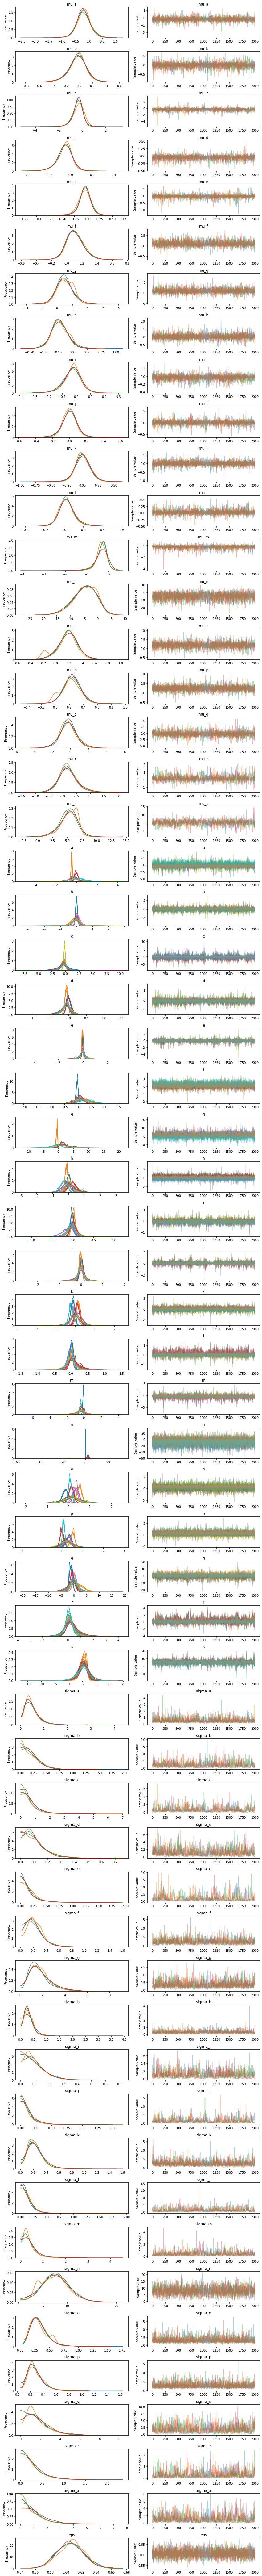

In [69]:
pm.traceplot(hierarchical_trace)

In [70]:
hierarchical_trace.varnames

['mu_a',
 'sigma_a_log__',
 'mu_b',
 'sigma_b_log__',
 'mu_c',
 'sigma_c_log__',
 'mu_d',
 'sigma_d_log__',
 'mu_e',
 'sigma_e_log__',
 'mu_f',
 'sigma_f_log__',
 'mu_g',
 'sigma_g_log__',
 'mu_h',
 'sigma_h_log__',
 'mu_i',
 'sigma_i_log__',
 'mu_j',
 'sigma_j_log__',
 'mu_k',
 'sigma_k_log__',
 'mu_l',
 'sigma_l_log__',
 'mu_m',
 'sigma_m_log__',
 'mu_n',
 'sigma_n_log__',
 'mu_o',
 'sigma_o_log__',
 'mu_p',
 'sigma_p_log__',
 'mu_q',
 'sigma_q_log__',
 'mu_r',
 'sigma_r_log__',
 'mu_s',
 'sigma_s_log__',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 'eps_log__',
 'sigma_a',
 'sigma_b',
 'sigma_c',
 'sigma_d',
 'sigma_e',
 'sigma_f',
 'sigma_g',
 'sigma_h',
 'sigma_i',
 'sigma_j',
 'sigma_k',
 'sigma_l',
 'sigma_m',
 'sigma_n',
 'sigma_o',
 'sigma_p',
 'sigma_q',
 'sigma_r',
 'sigma_s',
 'eps']

In [71]:
var_dict = {}
for variable in hierarchical_trace.varnames:
    var_dict[variable] = hierarchical_trace[variable]

In [81]:
var_dict['a'].shape

(8000, 10)

In [75]:
# Results into a dataframe
var_weights = pd.DataFrame(var_dict)
    
# Means for all the weights
var_means = var_weights.mean(axis=0)

Exception: Data must be 1-dimensional